# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

previsao = pd.read_csv("previsao_de_renda.csv")

previsao['data_ref'] = pd.to_datetime(previsao['data_ref'])

display(previsao)

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [12]:
qualitativas = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

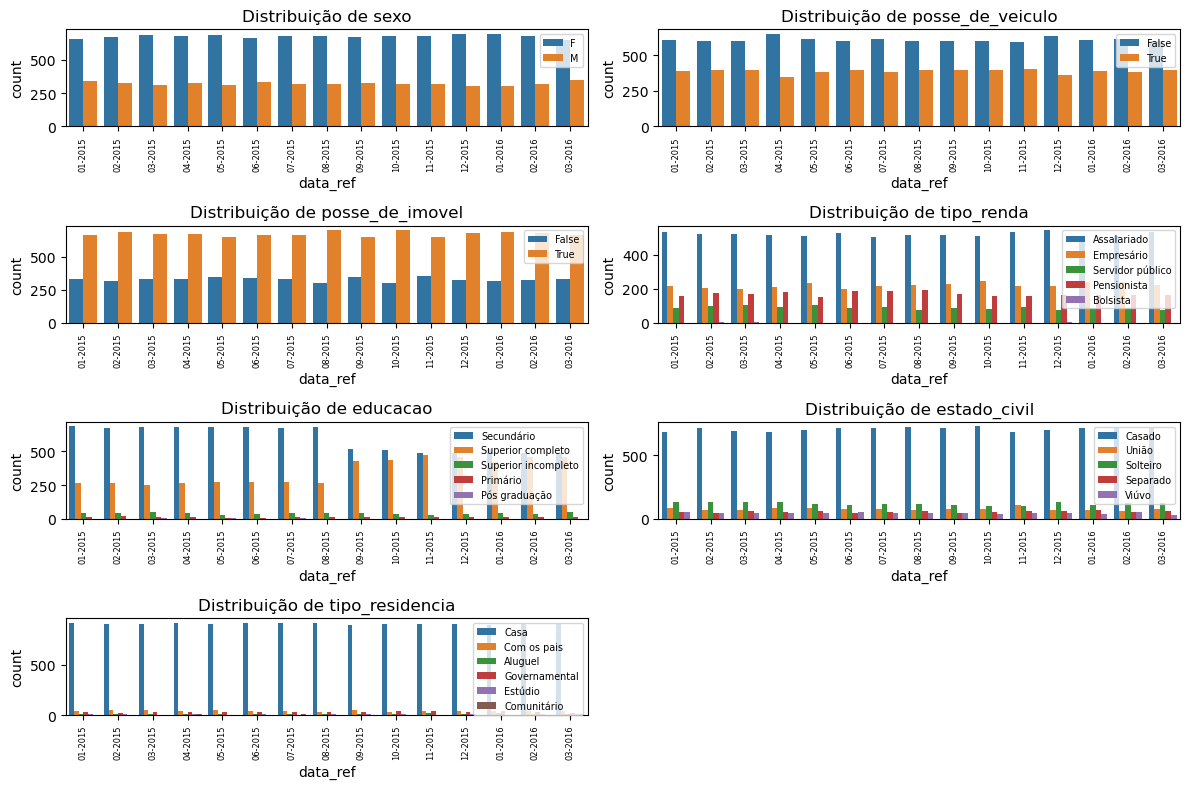

In [13]:
plt.figure(figsize=(12, 8))

for i, var in enumerate(qualitativas, 1):
    plt.subplot(4, 2, i)
    ax = sns.countplot(x='data_ref', hue=var, data=previsao)
    tick_labs = previsao['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
    plt.title(f'Distribuição de {var}')
    ticks = ax.set_xticks(list(range(previsao['data_ref'].nunique())))
    labels = ax.set_xticklabels(tick_labs, rotation=90, size=6)
    plt.legend(loc='upper right', fontsize="x-small") 
    
plt.tight_layout()  
plt.show()
    

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

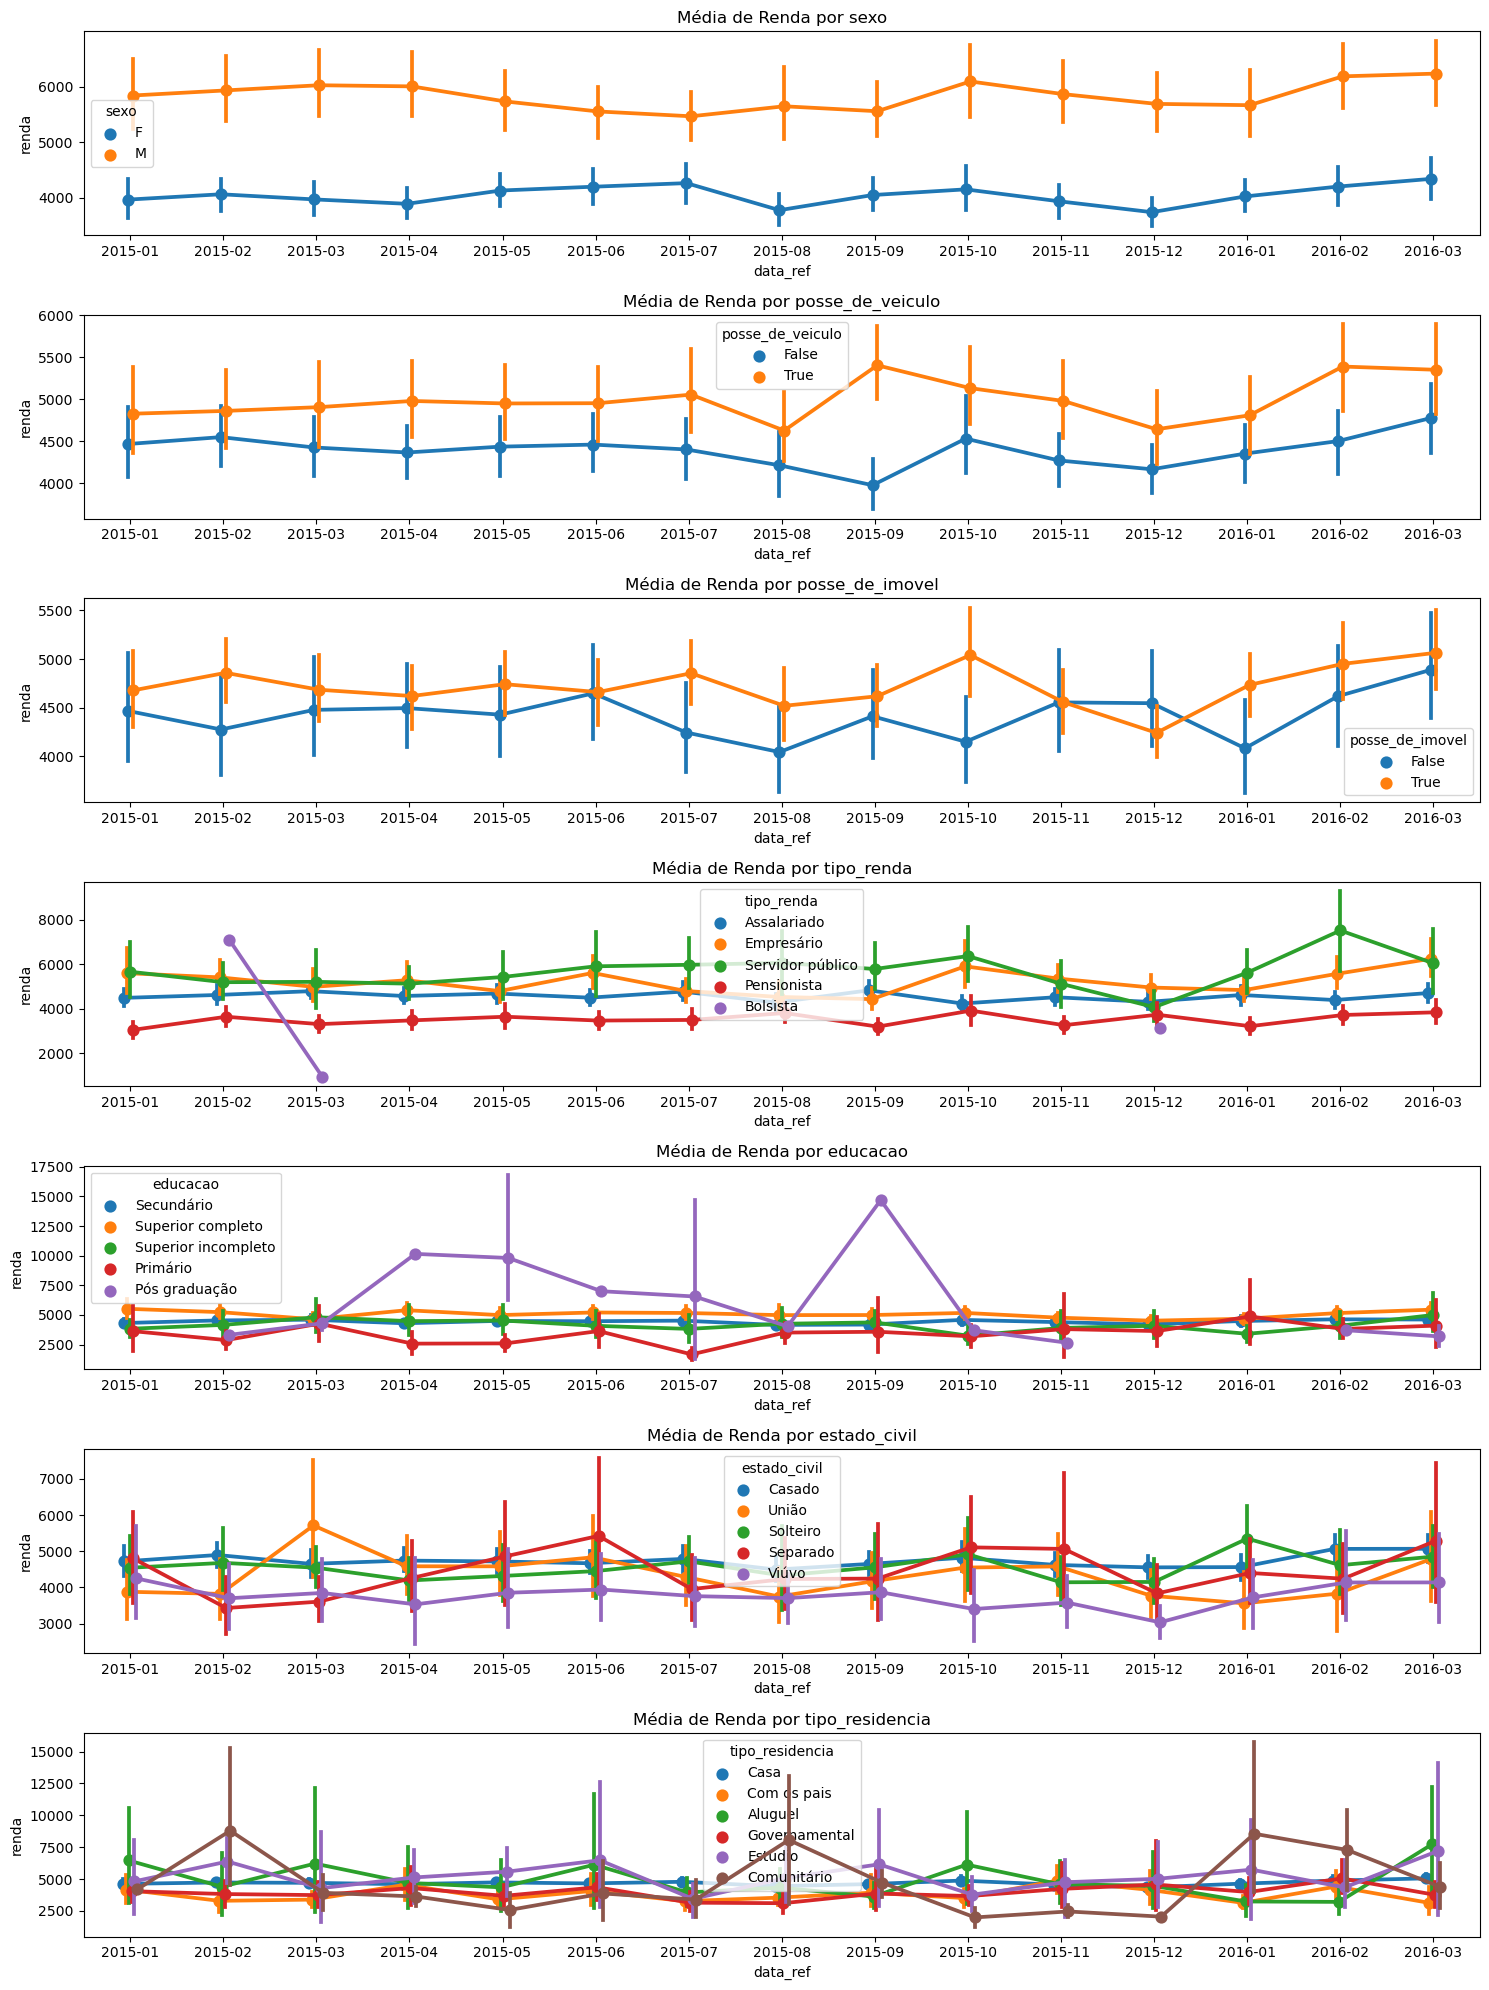

In [31]:
def grafico_media(hue: str, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    g = sns.pointplot(data=previsao, x='data_ref', y='renda', hue=hue, dodge=True, ax=ax)
    original_xticks = g.get_xticks()
    x_labels = [pd.to_datetime(label.get_text()).strftime('%Y-%m') for label in g.get_xticklabels()]
    ax.set_xticks(original_xticks)
    ax.set_xticklabels(x_labels)
    ax.set_title(f'Média de Renda por {hue}')
    return g

fig, axes = plt.subplots(7, 1, figsize=(15, 20))

grafico_media('sexo', ax=axes[0])
grafico_media('posse_de_veiculo', ax=axes[1])
grafico_media('posse_de_imovel', ax=axes[2])
grafico_media('tipo_renda', ax=axes[3])
grafico_media('educacao', ax=axes[4])
grafico_media('estado_civil', ax=axes[5])
grafico_media('tipo_residencia', ax=axes[6])

plt.tight_layout()  
plt.show()

In [ ]:
# A distribuição da educação tem uma variação significativa a partir de 09-2015. As outras variáveis podem ser usadas numa modelagem.